In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
from nltk.probability import FreqDist
import matplotlib.pyplot as plt


In [2]:
# Load the text file
#nltk.download() for downloading
file = open('novel.txt', 'r')
text = file.read()

In [3]:
# Tokenization
tokens = word_tokenize(text)
tokens

['Agatha',
 'Christie',
 '-',
 'Death',
 'On',
 'The',
 'Nile',
 'PART',
 'ONE',
 'CHAPTER',
 '1',
 'Linnet',
 'Ridgeway',
 '!',
 '``',
 'That',
 "'s",
 'Her',
 '.',
 "''",
 'said',
 'Mr.',
 'Burnaby',
 ',',
 'the',
 'landlord',
 'of',
 'the',
 'Three',
 'Crowns',
 '.',
 'He',
 'nudged',
 'his',
 'companion',
 '.',
 'The',
 'two',
 'men',
 'stared',
 'with',
 'round',
 'bucolic',
 'eyes',
 'and',
 'slightly',
 'open',
 'mouths',
 '.',
 'A',
 'big',
 'scarlet',
 'Rolls-Royce',
 'had',
 'just',
 'stopped',
 'in',
 'front',
 'of',
 'the',
 'local',
 'post',
 'office',
 '.',
 'A',
 'girl',
 'jumped',
 'out',
 ',',
 'a',
 'girl',
 'without',
 'a',
 'hat',
 'and',
 'wearing',
 'a',
 'frock',
 'that',
 'looked',
 '(',
 'but',
 'only',
 'looked',
 ')',
 'simple',
 '.',
 'A',
 'girl',
 'with',
 'golden',
 'hair',
 'and',
 'straight',
 'autocratic',
 'features',
 '--',
 'a',
 'girl',
 'with',
 'a',
 'lovely',
 'shape',
 '--',
 'a',
 'girl',
 'such',
 'as',
 'was',
 'seldom',
 'seen',
 'in',
 'Ma

In [4]:
# Stopword removal
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
tokens

['Agatha',
 'Christie',
 'Death',
 'Nile',
 'PART',
 'ONE',
 'CHAPTER',
 'Linnet',
 'Ridgeway',
 'said',
 'Burnaby',
 'landlord',
 'Three',
 'Crowns',
 'nudged',
 'companion',
 'two',
 'men',
 'stared',
 'round',
 'bucolic',
 'eyes',
 'slightly',
 'open',
 'mouths',
 'big',
 'scarlet',
 'stopped',
 'front',
 'local',
 'post',
 'office',
 'girl',
 'jumped',
 'girl',
 'without',
 'hat',
 'wearing',
 'frock',
 'looked',
 'looked',
 'simple',
 'girl',
 'golden',
 'hair',
 'straight',
 'autocratic',
 'features',
 'girl',
 'lovely',
 'shape',
 'girl',
 'seldom',
 'seen',
 'MaltonunderWode',
 'quick',
 'imperative',
 'step',
 'passed',
 'post',
 'office',
 'said',
 'Burnaby',
 'went',
 'low',
 'awed',
 'voice',
 'Millions',
 'got',
 'Going',
 'spend',
 'thousands',
 'place',
 'Swimming',
 'pools',
 'going',
 'Italian',
 'gardens',
 'ballroom',
 'half',
 'house',
 'pulled',
 'rebuilt',
 'bring',
 'money',
 'town',
 'said',
 'friend',
 'lean',
 'man',
 'tone',
 'envious',
 'grudging',
 'Burnaby

In [5]:
# Stemming
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in tokens]
stemmed_tokens
" ".join(stemmed_tokens)

'agatha christi death nile part one chapter linnet ridgeway said burnabi landlord three crown nudg companion two men stare round bucol eye slightli open mouth big scarlet stop front local post offic girl jump girl without hat wear frock look look simpl girl golden hair straight autocrat featur girl love shape girl seldom seen maltonunderwod quick imper step pass post offic said burnabi went low awe voic million got go spend thousand place swim pool go italian garden ballroom half hous pull rebuilt bring money town said friend lean man tone enviou grudg burnabi agre ye great thing great thing burnabi complac wake us proper ad bit differ sir georg said ah said burnabi indulg never luck get place cool sixti thousand heard lean man whistl burnabi went triumphantli say spent anoth sixti thousand finish wick said lean man get money america heard mother daughter one millionair bloke quit like pictur girl came post offic climb car drove lean man follow eye mutter seem wrong look like money loo

In [6]:
#Lemmatization
lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
lemmatized_words

['Agatha',
 'Christie',
 'Death',
 'Nile',
 'PART',
 'ONE',
 'CHAPTER',
 'Linnet',
 'Ridgeway',
 'said',
 'Burnaby',
 'landlord',
 'Three',
 'Crowns',
 'nudged',
 'companion',
 'two',
 'men',
 'stared',
 'round',
 'bucolic',
 'eye',
 'slightly',
 'open',
 'mouth',
 'big',
 'scarlet',
 'stopped',
 'front',
 'local',
 'post',
 'office',
 'girl',
 'jumped',
 'girl',
 'without',
 'hat',
 'wearing',
 'frock',
 'looked',
 'looked',
 'simple',
 'girl',
 'golden',
 'hair',
 'straight',
 'autocratic',
 'feature',
 'girl',
 'lovely',
 'shape',
 'girl',
 'seldom',
 'seen',
 'MaltonunderWode',
 'quick',
 'imperative',
 'step',
 'passed',
 'post',
 'office',
 'said',
 'Burnaby',
 'went',
 'low',
 'awed',
 'voice',
 'Millions',
 'got',
 'Going',
 'spend',
 'thousand',
 'place',
 'Swimming',
 'pool',
 'going',
 'Italian',
 'garden',
 'ballroom',
 'half',
 'house',
 'pulled',
 'rebuilt',
 'bring',
 'money',
 'town',
 'said',
 'friend',
 'lean',
 'man',
 'tone',
 'envious',
 'grudging',
 'Burnaby',
 'a

In [7]:
#Storing preprocessed text
preprocessed_text = " ".join(lemmatized_words)
preprocessed_text

'Agatha Christie Death Nile PART ONE CHAPTER Linnet Ridgeway said Burnaby landlord Three Crowns nudged companion two men stared round bucolic eye slightly open mouth big scarlet stopped front local post office girl jumped girl without hat wearing frock looked looked simple girl golden hair straight autocratic feature girl lovely shape girl seldom seen MaltonunderWode quick imperative step passed post office said Burnaby went low awed voice Millions got Going spend thousand place Swimming pool going Italian garden ballroom half house pulled rebuilt bring money town said friend lean man tone envious grudging Burnaby agreed Yes great thing great thing Burnaby complacent Wake u proper added Bit difference Sir George said Ah said Burnaby indulgently Never luck get place cool sixty thousand heard lean man whistled Burnaby went triumphantly say spent another sixty thousand finished Wicked said lean man get money America heard mother daughter one millionaire bloke Quite like picture girl came 

In [8]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([preprocessed_text])
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

In [9]:
# Extract keywords and their scores
keywords = {feature_names[i]: tfidf_scores[i] for i in range(len(feature_names))}
sorted_keywords = dict(sorted(keywords.items(), key=lambda item: item[1], reverse=True))

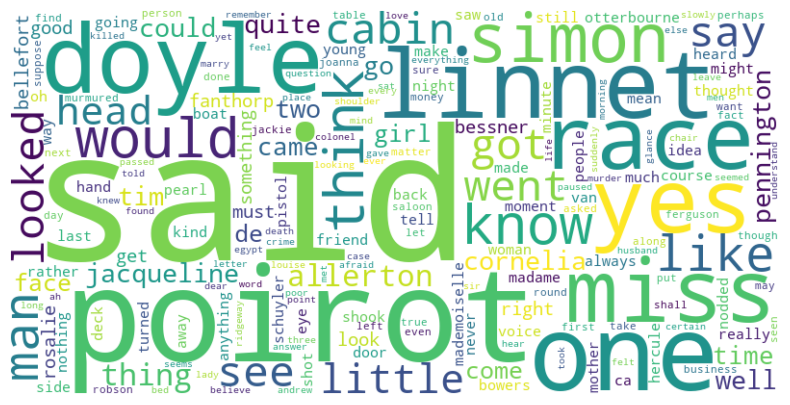

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sorted_keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

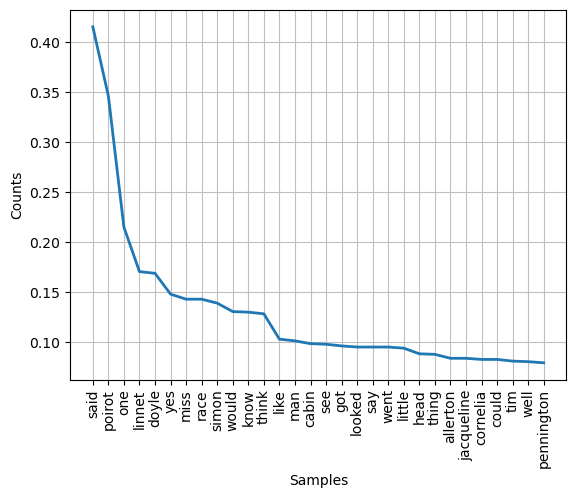

In [11]:
fdist = FreqDist(sorted_keywords)
fdist.plot(30)
plt.show()

In [12]:
word_counts = Counter(preprocessed_text.split())
word_counts

Counter({'Agatha': 1,
         'Christie': 1,
         'Death': 7,
         'Nile': 28,
         'PART': 2,
         'ONE': 1,
         'CHAPTER': 31,
         'Linnet': 302,
         'Ridgeway': 42,
         'said': 736,
         'Burnaby': 8,
         'landlord': 1,
         'Three': 6,
         'Crowns': 2,
         'nudged': 1,
         'companion': 14,
         'two': 132,
         'men': 37,
         'stared': 23,
         'round': 57,
         'bucolic': 1,
         'eye': 93,
         'slightly': 26,
         'open': 30,
         'mouth': 15,
         'big': 26,
         'scarlet': 7,
         'stopped': 24,
         'front': 9,
         'local': 3,
         'post': 7,
         'office': 8,
         'girl': 118,
         'jumped': 5,
         'without': 26,
         'hat': 6,
         'wearing': 10,
         'frock': 3,
         'looked': 169,
         'simple': 21,
         'golden': 7,
         'hair': 13,
         'straight': 15,
         'autocratic': 2,
         'feature':

In [13]:
import numpy as np
from PIL import Image
mask = np.array(Image.open(r'gfg.png'))

In [25]:
mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [14]:
mask2 = np.array(Image.open(r'bird.png'))
wc2 = WordCloud(
               mask = mask2, 
               background_color = "white",
               max_words = 2000,
               max_font_size = 500,
               width = mask.shape[1],
               height = mask.shape[0])

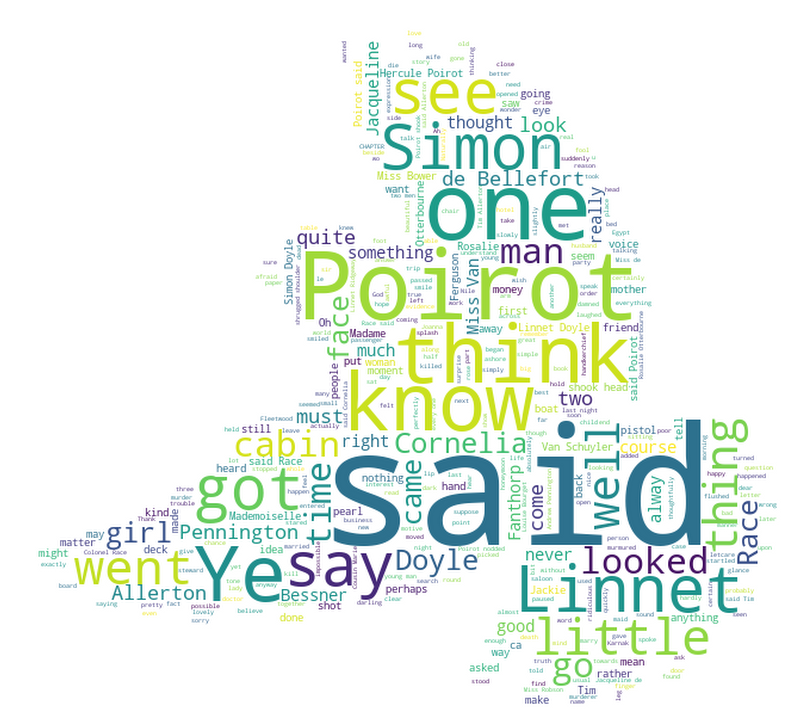

In [15]:
wc2.generate(preprocessed_text)
plt.figure(figsize=[10,10])
plt.imshow(wc2, interpolation = "lanczos")
plt.axis('off')
plt.show()

In [16]:
mask3 = np.array(Image.open(r'truck.png'))
wc3 = WordCloud(
               mask = mask3, 
               background_color = "white",
               max_words = 2000,
               max_font_size = 500,
               width = mask.shape[1],
               height = mask.shape[0])

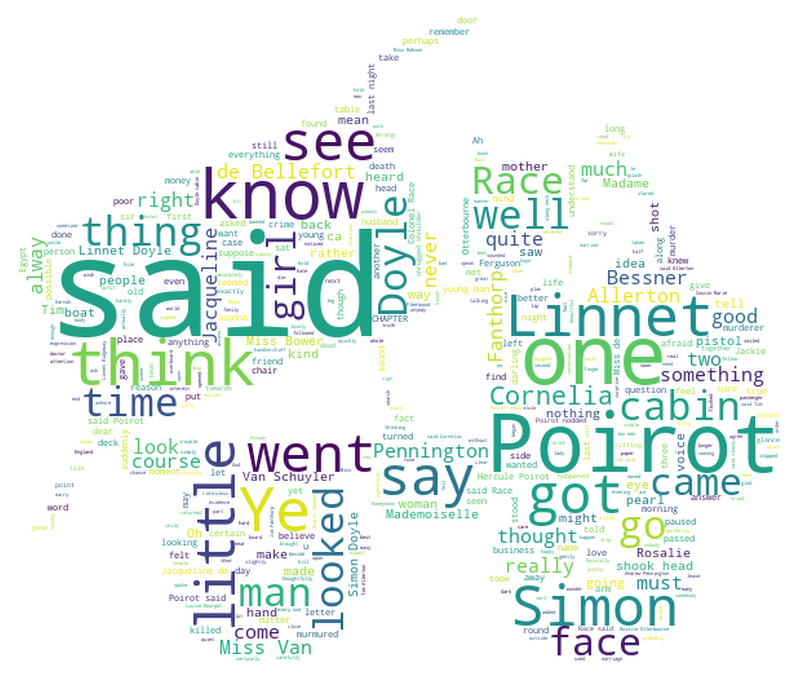

In [17]:
wc3.generate(preprocessed_text)
plt.figure(figsize=[10,10])
plt.imshow(wc3, interpolation = "lanczos")
plt.axis('off')
plt.show()

In [23]:
mask3 = np.array(Image.open(r'netflix.png'))
wc3 = WordCloud(
               mask = mask3, 
               background_color = "white",
               max_words = 2000,
               max_font_size = 500,
               width = mask.shape[1],
               height = mask.shape[0])

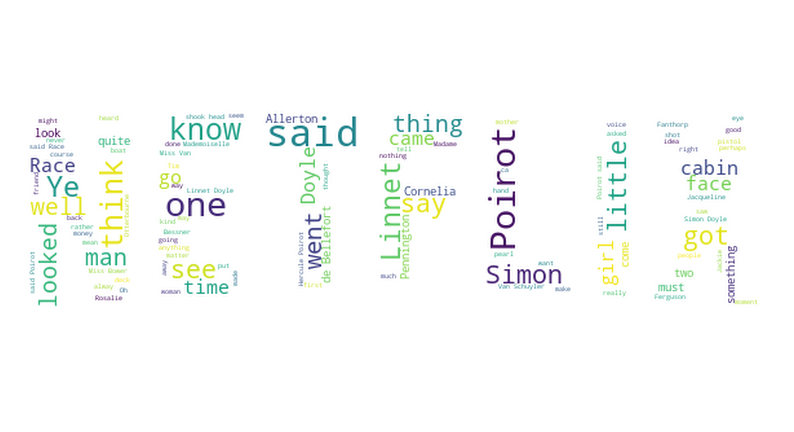

In [24]:
wc3.generate(preprocessed_text)
plt.figure(figsize=[10,10])
plt.imshow(wc3, interpolation = "lanczos")
plt.axis('off')
plt.show()